Equivalence between exponential filter and driven 1-D linear dynamical system

Filter/convolution:
$$x(t) = u(t) * \Theta(t)\exp(-t/\tau) = \int_0^\infty u(t-t')\exp(-t'/\tau) dt'$$

Linear dynamical system:
$$\tau\frac{dx(t)}{dt} = -x(t) + u(t)$$



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from disp import set_font_size


TAU = 3
DT = .1
T = 100

SGM = .1

t = np.arange(0, T, DT)
u = SGM/np.sqrt(DT)*np.random.randn(len(t))

Filter/convolution formulation

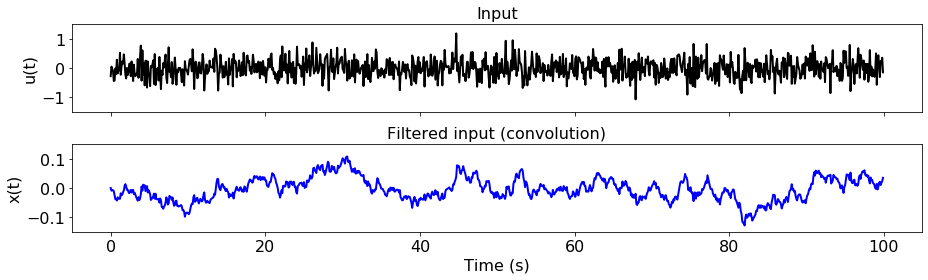

In [2]:
th = np.arange(0, 10*TAU, DT)
h = np.exp(-th/TAU)*DT/TAU

x = np.nan * np.zeros(len(t))
x[0] = 0

for ct, _t in enumerate(t[1:], 1):

    if ct < len(th):  # beginning of sequence
        x[ct] = h[:ct] @ u[:ct][::-1]
    else:
        x[ct] = h @ u[ct-len(th):ct][::-1]
    
fig, axs = plt.subplots(2, 1, figsize=(13, 4), tight_layout=True, sharex=True)

axs[0].plot(t, u, lw=2, c='k')

axs[0].set_ylim(-1.5, 1.5)
axs[0].set_ylabel('u(t)')
axs[0].set_title('Input')

axs[1].plot(t, x, lw=2, c='b')

axs[1].set_ylim(-.15, .15)
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('x(t)')
axs[1].set_title('Filtered input (convolution)')

for ax in axs: set_font_size(ax, 16)

Diff EQ formulation

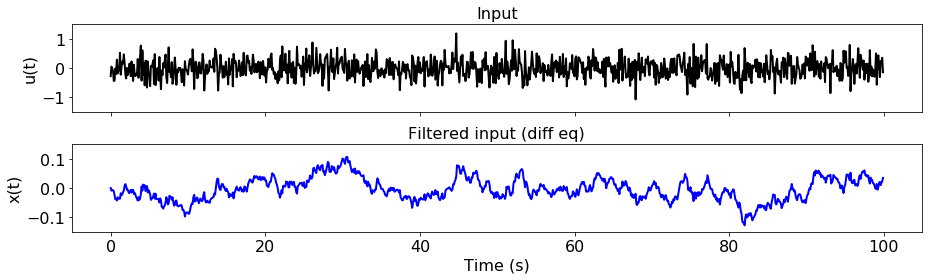

In [3]:
x = np.nan * np.zeros(len(t))
x[0] = 0

for ct, _t in enumerate(t[1:], 1):

    dx = DT/TAU*(-x[ct-1] + u[ct-1])
    x[ct] = x[ct-1] + dx
    
fig, axs = plt.subplots(2, 1, figsize=(13, 4), tight_layout=True, sharex=True)

axs[0].plot(t, u, lw=2, c='k')

axs[0].set_ylim(-1.5, 1.5)
axs[0].set_ylabel('u(t)')
axs[0].set_title('Input')

axs[1].plot(t, x, lw=2, c='b')

axs[1].set_ylim(-.15, .15)
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('x(t)')
axs[1].set_title('Filtered input (diff eq)')

for ax in axs: set_font_size(ax, 16)